In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.signal import butter, lfilter
import librosa, librosa.display
from scipy.signal import hilbert, chirp
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import glob
from brian2 import *
from brian2hears import *
%matplotlib inline


def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    import scipy
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = scipy.signal.welch(data, sf,window = 'hamming',nfft = 512 ,scaling = 'density',average = 'mean')
#     if peak:
#         stats = dict(zip(freqs, psd))
#         peak_amp = (max(psd))
#         peak_freq = (max(stats, key=stats.get))
#         return peak_amp, peak_freq
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)  # assignment operator shorthand for / and =
        
    return freqs, psd ,bp
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butt_low(lowcut, fs, order=2):
    nyq = 0.5 * sr
    low = lowcut / nyq
    b, a = butter(order, low, btype='low')
    return b, a


In [3]:
##gammatone filterbank and envelop
#path = 'D:\Wav_al\RU_test'
#file_list = glob.glob(path + r"\*\sent\*.wav")  # glob匹配所有的符合条件的文件，并将以list的形式返回 国家
#result_all = []
#for audio in file_list:
#audio = file_list[2]
# x, sr = librosa.load('audio/modified/Cn1.wav')
# #x, sr = librosa.load(audio)
# x, index = librosa.effects.trim(x,top_db= 20)
# fs = sr

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.signal import butter, lfilter
import librosa, librosa.display
from scipy.signal import hilbert, chirp
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import glob
from brian2 import *
from brian2hears import *
%matplotlib inline


def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    import scipy
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = scipy.signal.welch(data, sf,window = 'hamming',nfft = 512 ,scaling = 'density',average = 'mean')
#     if peak:
#         stats = dict(zip(freqs, psd))
#         peak_amp = (max(psd))
#         peak_freq = (max(stats, key=stats.get))
#         return peak_amp, peak_freq
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)  # assignment operator shorthand for / and =
        
    return freqs, psd ,bp
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butt_low(lowcut, fs, order=2):
    nyq = 0.5 * sr
    low = lowcut / nyq
    b, a = butter(order, low, btype='low')
    return b, a



In [4]:
sound = loadsound('audio/th.wav')
#x, index = librosa.effects.trim(sound,top_db= 20)

fs = 22050
cf = erbspace(125*Hz, 8*kHz, 32)
b1 = 1.019
gammatone = Gammatone(sound, cf, b=b1)
gt_mon = gammatone.process()
env = []

for i in range(len(gt_mon[1,:])):
    y = gt_mon[:,i]
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)
    env.append(amplitude_envelope)
    
    
env = np.array([np.abs(hilbert(gt_mon[:,i])) for i in range(len(gt_mon[1,:]))])    

    
modulation_filter = [2,4,8,16,32,64,128,256,512];       
lowcut = modulation_filter[:-1]
highcut = modulation_filter[1:]
modu = []
final = []
for j in range(len(env)):  
    modu = []
    for i in range(len(lowcut)):
        y= butter_bandpass_filter(env[j], lowcut[i], highcut[i], fs , order=2)
        #print('band pass frequency range is {} - {}'.format(lowcut[i], highcut[i]))
        modu.append(y)
    final = final + modu
len(final)

256

In [21]:
##%timeit env = np.array([np.abs(hilbert(gt_mon[:,i])) for i in range(len(gt_mon[1,:]))])    
import time
s = time.time()
env = np.zeros(shape=len(gt_mon[:,1]))
for i in range(len(gt_mon[1,:])):
    y = gt_mon[:,i]
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)
    env = np.append(env,amplitude_envelope,axis=0)
    #env.append(amplitude_envelope)
    
e = time.time()
print(e-s)
    
    
%time env = np.array([np.abs(hilbert(gt_mon[:,i])) for i in range(len(gt_mon[1,:]))])    
#速度问题有点难解决；

0.22040987014770508
Wall time: 138 ms


In [20]:
env.shape

(32, 56000)

In [ ]:
energy_all = []
for i in range(len(final)):
    x = final[i]
    hop_length = round(0.04*16000)   # 有点断; 
    frame_length = round(0.256*16000)
    rmse = librosa.feature.rms(final[i], frame_length=frame_length, hop_length=hop_length, center=True)
    rmse = rmse[0]
    energy = rmse
    energy = librosa.power_to_db(rmse)
    energy_all.append(energy)
E = np.array(energy_all)
#E_re = E.reshape(32,5,len(energy))
E_re = E.reshape(32,8,len(energy))

E_mean = np.mean(E_re,2)

In [ ]:
#s = E_re[:,:,66]
s = E_mean
y = np.linspace(1,32,32)
#x = np.linspace(1,6,5)
x = np.linspace(1,8,8)

T, F = np.meshgrid(x,y) 
plt.pcolormesh(T,F,s,cmap='jet')
plt.ylabel('acoustic frequency : HZ')
plt.xlabel('modulation frequency : HZ')
plt.colorbar()

Text(0.5, 0, 'modulation frequency : HZ')

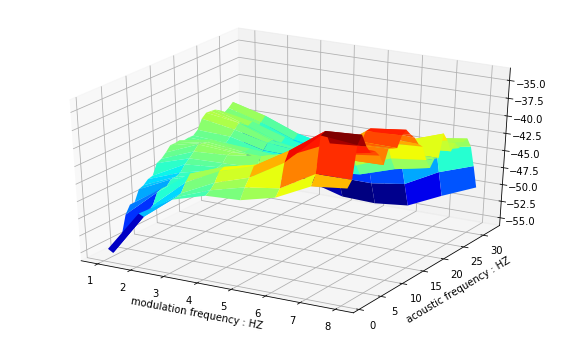

In [171]:
plt.rcParams['figure.figsize'] = (10, 6)
s = E_mean
from mpl_toolkits.mplot3d import Axes3D
y = np.linspace(1,32,32)
#x = np.linspace(5,1,5)
x = np.linspace(8,1,8)

T, F = np.meshgrid(x,y) 
fig = plt.figure()
ax = fig.gca(projection='3d') # 绘制成3D
ax.plot_surface(T,F,s,cmap='jet')
#ax.plot_surface(T[None,:], F[:,None], 10*np.log10(Zxx), cmap='plasma')
#plt.xticks(y,xtk)
#plt.yticks(x,ytk)
plt.ylabel('acoustic frequency : HZ')
plt.xlabel('modulation frequency : HZ')